<a href="https://colab.research.google.com/github/IDCE-MSGIS/lab-5-airport-historgram-data-sophspilio/blob/main/30274_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
f= open('camp_stats.csv')
for row in csv.reader(f):
  print(row)

#Challenge 1 
print all airport names for a particular country 

In [ ]:
#upload local script to colab
from google.colab import files
uploaded = files.upload()

In [5]:
import csv
airports = open("airports.dat")

In [ ]:
#prints all the airports for a given country 
for row in csv.reader(airports):
  if row[3] == 'Canada':
    print(row[1])

In [ ]:
#prints all airports for a given country using user input
country = str(input('Country Name? ', ))
for row in csv.reader(airports):
  if row[3] == country:
    print(row[1])

# Challenge 2
create a dictionary mapping airport ID key and geographic coordinates 

In [11]:
airports = open("airports.dat")
#assign airport ID and lat/long to lists from csv
latdict = {}
londict = {}
airID =[]
latitude = []
longitude = []
#for each row in airports.dat, add the airID to airID list, lat to latitude list, and lon to longitude list
for row in csv.reader(airports):
  airID.append(row[0])
  latitude.append(row[6])
  longitude.append(row[7])
#create dictionary from airID and lat lists
latdict = dict(zip(airID,latitude))
#create dictionary for longitude and airID
londict = dict(zip(airID,longitude))

# Challenge 3
reads airline routes from `routes.dat`, looks up lat and long for source and destination airports, and builds a list of route distances 

In [ ]:
import geo_distance

In [ ]:
#option 1
routes = open('routes.dat')
route_dist = []
for row in csv.reader(routes):
  if row[5] in airID and row[3] in airID:
    route_dist.append(geo_distance.distance(float(latdict[row[3]]),float(londict[row[3]]),float(latdict[row[5]]),float(londict[row[5]])))

route_dist


In [ ]:
#option 2
routes = open('routes.dat')
#create empty list for route distances 
route_dist = []
#loop to go through each row and assign the source and destination coordinates, so they can be put in the geodistance module
for row in csv.reader(routes):
  if row[5] in airID and row[3] in airID: #run loop only if the source airID (row[3]) and desitnation airID (row[5]) exist in the airID list
    lat1 = float(latdict[row[3]])
    lon1 = float(londict[row[3]])
    lat2 = float(latdict[row[5]])
    lon2 = float(londict[row[5]])
    route_dist.append(geo_distance.distance(lat1,lon1,lat2,lon2))

route_dist

# Challenge 4
create a histogram showing frequency of flights by distance

Text(0.5, 1.0, 'Frequency of Flights by Distance')

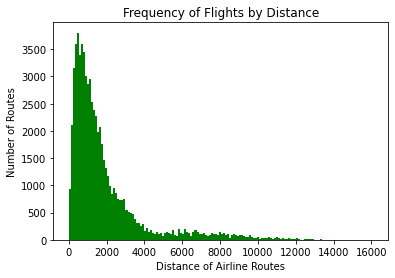

In [61]:
import numpy as np
import matplotlib.pyplot as plt
#histogram plot with 150 bins showing frequency of route  distance
plt.hist(route_dist,150,color= 'green')
plt.xlabel('Distance of Airline Routes')
plt.ylabel('Number of Routes')
plt.title('Frequency of Flights by Distance')